In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dtype 정해둬야 오류가 안남 // 찾아보고 설명추가

In [2]:
classification=pd.read_csv('classification.csv',dtype='unicode')
c_d=pd.read_csv('customer_Demo.csv',dtype='unicode')
deal=pd.read_csv('deal.csv',dtype='unicode')
o_a=pd.read_csv('online_action.csv',dtype='unicode')

In [3]:
classification.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [4]:
c_d.tail()

,clnt_id,clnt_gender,clnt_age
72394,72425,unknown,unknown
72395,72426,unknown,unknown
72396,72427,unknown,unknown
72397,72428,unknown,unknown
72398,72429,unknown,unknown


In [5]:
c_d['clnt_gender'].value_counts()

unknown    60154
F          10352
M           1893
Name: clnt_gender, dtype: int64

In [6]:
c_d['clnt_age'].value_counts()

unknown    60154
40          4948
30          4307
50          1694
20           924
60           326
10            46
Name: clnt_age, dtype: int64

# Customer_Demo (고객정보)에서 고객의 성별과 나이 결측치(unknown) 가 상당히 많음을 확인할 수 있어서 EDA 과정에서 필요없는 데이터로 판단함. --> 뒤에 df_hbl 데이터(실제 거래가 이뤄진 데이터) 에서는 성별이 명시되어있음

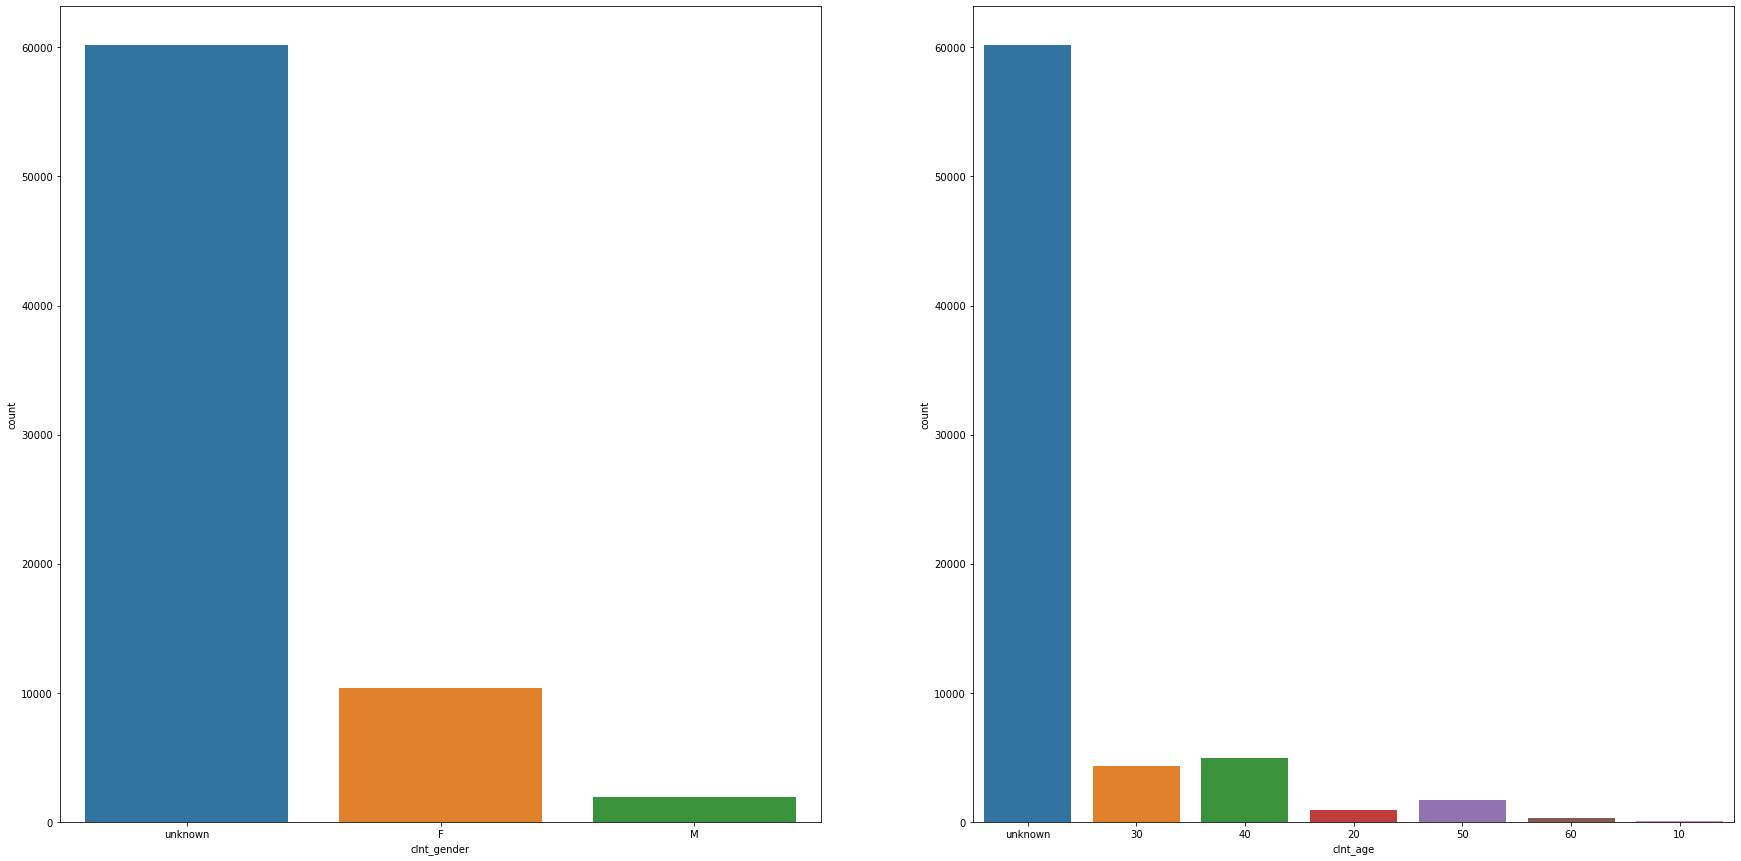

In [7]:
fig,axes=plt.subplots(1,2,figsize=(30,15))
ax1=sns.countplot(x='clnt_gender',data=c_d, ax=axes[0])
ax2=sns.countplot(x='clnt_age',data=c_d, ax=axes[1])

In [8]:
o_a.tail()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
3196357,31040,001,001,0,A02,20190815,03:47,13525,NaN,다이슨 에어랩,4,62,unknown,mobile_web
3196358,04129,001,002,0,A02,20190721,01:22,250099,NaN,여성메탈시계,3,250,unknown,mobile_web
3196359,04129,001,001,0,A02,20190721,01:18,1525,NaN,여성메탈시계,3,250,unknown,mobile_web
3196360,54403,003,001,0,A02,20190731,20:14,16905,NaN,비비고왕교자,3,68,unknown,mobile_app
3196361,54403,004,001,0,A02,20190818,16:35,82700,NaN,에포테쉬볼륨팝브러쉬,5,101,unknown,mobile_app


In [9]:
deal.tail()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
599956,35311,002839,003,B03,0339,20190927,14:09,3500,1
599957,35311,002839,004,B03,0339,20190927,14:09,3600,2
599958,35311,002839,005,B03,0339,20190927,14:09,3500,1
599959,35311,002839,002,B03,0339,20190927,14:09,4500,1
599960,35311,002839,006,B03,0324,20190927,14:09,6800,1


In [10]:
c_d['clnt_id'].describe()

count     72399
unique    72399
top       12692
freq          1
Name: clnt_id, dtype: object

In [11]:
o_a['clnt_id'].describe()

count     3196362
unique      72399
top         61252
freq         6663
Name: clnt_id, dtype: object

In [12]:
deal['clnt_id'].describe()

count     599961
unique     11284
top        27221
freq         757
Name: clnt_id, dtype: object

In [13]:
c_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72399 entries, 0 to 72398
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clnt_id      72399 non-null  object
 1   clnt_gender  72399 non-null  object
 2   clnt_age     72399 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [14]:
deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599961 entries, 0 to 599960
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   clnt_id    599961 non-null  object
 1   trans_id   599961 non-null  object
 2   trans_seq  599961 non-null  object
 3   biz_unit   599961 non-null  object
 4   pd_c       599961 non-null  object
 5   de_dt      599961 non-null  object
 6   de_tm      599961 non-null  object
 7   buy_am     599961 non-null  object
 8   buy_ct     599961 non-null  object
dtypes: object(9)
memory usage: 41.2+ MB


In [15]:
for col in c_d.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (c_d[col].isnull().sum() / c_d[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
clnt_gender	 의 비어있는 자료비율 : 0.00%
  clnt_age	 의 비어있는 자료비율 : 0.00%


In [16]:
for col in deal.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (deal[col].isnull().sum() / deal[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 0.00%
 trans_seq	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
      pd_c	 의 비어있는 자료비율 : 0.00%
     de_dt	 의 비어있는 자료비율 : 0.00%
     de_tm	 의 비어있는 자료비율 : 0.00%
    buy_am	 의 비어있는 자료비율 : 0.00%
    buy_ct	 의 비어있는 자료비율 : 0.00%


In [17]:
deal['buy_ct'].value_counts().describe()

count       338.000000
mean       1775.032544
std       27290.657041
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max      497831.000000
Name: buy_ct, dtype: float64

In [18]:
deal.drop_duplicates('clnt_id',keep='first')

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,001,A03,unknown,20190920,12:41,5990,1
1,21279,104907,004,A03,unknown,20190920,10:27,10900,1
2,39423,105124,011,A03,unknown,20190920,17:26,12900,1
3,18362,104010,001,A03,unknown,20190920,09:57,9900,1
6,48969,104882,005,A03,0572,20190920,10:05,7490,1
...,...,...,...,...,...,...,...,...,...
599726,24053,003938,001,B03,0585,20190824,17:17,5000,1
599856,20610,012521,001,B03,0312,20190807,22:42,3900,1
599937,16091,005636,002,B03,1054,20190927,21:08,8900,1
599938,31304,002371,001,B03,0306,20190927,21:47,2500,1


In [19]:
deal

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,001,A03,unknown,20190920,12:41,5990,1
1,21279,104907,004,A03,unknown,20190920,10:27,10900,1
2,39423,105124,011,A03,unknown,20190920,17:26,12900,1
3,18362,104010,001,A03,unknown,20190920,09:57,9900,1
4,39423,105124,013,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,002839,003,B03,0339,20190927,14:09,3500,1
599957,35311,002839,004,B03,0339,20190927,14:09,3600,2
599958,35311,002839,005,B03,0339,20190927,14:09,3500,1
599959,35311,002839,002,B03,0339,20190927,14:09,4500,1


In [20]:
for col in o_a.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (o_a[col].isnull().sum() / o_a[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
   sess_id	 의 비어있는 자료비율 : 0.00%
   hit_seq	 의 비어있는 자료비율 : 0.00%
action_type	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
   sess_dt	 의 비어있는 자료비율 : 0.00%
    hit_tm	 의 비어있는 자료비율 : 0.00%
hit_pss_tm	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 98.22%
  sech_kwd	 의 비어있는 자료비율 : 79.61%
tot_pag_view_ct	 의 비어있는 자료비율 : 0.04%
tot_sess_hr_v	 의 비어있는 자료비율 : 1.80%
  trfc_src	 의 비어있는 자료비율 : 0.00%
dvc_ctg_nm	 의 비어있는 자료비율 : 55.77%


# 고객 Demo 정보와 거래정보를 병합.. 거래정보가 있는 고객들로만 병합하였음.

In [21]:
df_cd=pd.merge(c_d,deal)

In [22]:
df_cd

,clnt_id,clnt_gender,clnt_age,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,00002,F,30,065505,001,A03,0092,20190801,22:00,9000,5
1,00002,F,30,064691,005,A03,0092,20190731,21:25,1800,1
2,00002,F,30,064691,002,A03,0151,20190731,21:25,3990,1
3,00002,F,30,064691,003,A03,0351,20190731,21:25,4690,1
4,00002,F,30,062037,001,A03,0092,20190729,23:47,36000,20
...,...,...,...,...,...,...,...,...,...,...,...
599956,72424,M,40,136596,020,B01,0862,20190727,11:22,2000,1
599957,72424,M,40,136596,014,B01,1189,20190727,11:22,3960,2
599958,72424,M,40,136596,022,B01,0862,20190727,11:22,2000,2
599959,72424,M,40,085065,001,A01,1316,20190826,11:54,99000,1


In [23]:
#df_cd['clnt_id'].describe()
#count     661076
#unique     72399
#top        27221
#freq         757
#Name: clnt_id, dtype: object
## df_cd=pd.merge(c_d,deal,on='clnt_id',how='left') --> 거래정보가 없는 고객도 병합 , 차후수정

In [24]:
df_cd['clnt_id'].describe()

count     599961
unique     11284
top        27221
freq         757
Name: clnt_id, dtype: object

In [25]:
df_cd['clnt_id'].value_counts()

27221    757
42575    681
52362    623
71243    579
12198    565
        ... 
53632      1
22930      1
62998      1
37150      1
36091      1
Name: clnt_id, Length: 11284, dtype: int64

In [26]:
df_hbl=pd.merge(o_a,df_cd)
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,006,1568,20190716,11:41,1000,1
1,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,007,1583,20190716,11:41,1000,1
2,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,005,1625,20190716,11:41,1290,1
3,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,008,1394,20190716,11:41,100,1
4,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,001,0515,20190716,11:41,7980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,10:49,1200556,069636,NaN,...,unknown,mobile_app,F,40,001,1316,20190806,10:49,55000,1
127354,04355,019,005,6,A01,20190806,10:49,1200556,069636,NaN,...,unknown,mobile_app,F,40,002,1015,20190806,10:49,12900,1
127355,45318,001,001,6,A01,20190927,03:02,229247,110554,NaN,...,unknown,mobile_web,F,40,001,0666,20190927,03:02,26800,1
127356,52942,103,008,6,A01,20190823,00:46,2776837,082877,NaN,...,unknown,mobile_web,F,40,001,0999,20190823,09:10,149400,1


In [27]:
df_hbl['clnt_age'].value_counts()

40    62184
30    37042
50    20639
20     4100
60     3280
10      113
Name: clnt_age, dtype: int64

# 고객정보에서는 상당히 많은 결측치를 보여줬는데 실제 거래를 한 회원은 성별정보를 기입했음을 알 수 있다.

In [28]:
df_hbl['clnt_gender'].value_counts()

F    112868
M     14490
Name: clnt_gender, dtype: int64

In [29]:
#sns.countplot(x='clnt_id',data=df_hbl)

In [30]:
df_hbl['clnt_id'].value_counts()

54703    229
49906    225
22910    222
30018    216
49028    214
        ... 
63441      1
43726      1
59590      1
27532      1
46218      1
Name: clnt_id, Length: 8869, dtype: int64

In [31]:
df_hbl_clntnum=df_hbl.drop_duplicates('clnt_id',keep='first')
df_hbl_clntnum

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,006,1568,20190716,11:41,1000,1
8,49353,036,108,6,A03,20190820,10:38,1936038,080007,NaN,...,DIRECT,NaN,F,30,006,0179,20190820,10:38,9900,1
81,02154,005,067,6,A03,20190730,19:43,6103422,063786,NaN,...,DIRECT,NaN,M,40,004,1395,20190730,19:43,5700,2
92,25279,013,011,6,A03,20190822,15:36,1591652,081793,NaN,...,DIRECT,NaN,F,60,008,1573,20190822,15:36,2490,1
131,36785,002,041,6,A03,20190918,10:52,3850467,103046,NaN,...,PUSH,mobile_web,F,30,010,0516,20190918,10:52,2490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127340,43761,001,003,6,A01,20190708,12:33,603156,045730,NaN,...,unknown,mobile_app,F,30,001,1524,20190708,12:33,19000,1
127342,19004,001,001,6,A01,20190927,00:54,227713,110545,NaN,...,unknown,mobile_web,M,20,001,1659,20190927,00:54,24000,1
127343,02442,004,001,6,A01,20190813,08:57,561500,075041,NaN,...,unknown,mobile_app,F,40,001,1507,20190813,08:57,14000,1
127345,01743,002,002,6,A01,20190929,00:49,1906087,111987,NaN,...,unknown,mobile_app,F,50,002,0873,20190930,07:37,15200,1


In [32]:
df_hbl_clntnum['action_type'].value_counts()

6    8428
7     441
Name: action_type, dtype: int64

In [33]:
for col in df_hbl.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (df_hbl[col].isnull().sum() / df_hbl[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
   sess_id	 의 비어있는 자료비율 : 0.00%
   hit_seq	 의 비어있는 자료비율 : 0.00%
action_type	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
   sess_dt	 의 비어있는 자료비율 : 0.00%
    hit_tm	 의 비어있는 자료비율 : 0.00%
hit_pss_tm	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 0.00%
  sech_kwd	 의 비어있는 자료비율 : 100.00%
tot_pag_view_ct	 의 비어있는 자료비율 : 0.00%
tot_sess_hr_v	 의 비어있는 자료비율 : 0.24%
  trfc_src	 의 비어있는 자료비율 : 0.00%
dvc_ctg_nm	 의 비어있는 자료비율 : 71.83%
clnt_gender	 의 비어있는 자료비율 : 0.00%
  clnt_age	 의 비어있는 자료비율 : 0.00%
 trans_seq	 의 비어있는 자료비율 : 0.00%
      pd_c	 의 비어있는 자료비율 : 0.00%
     de_dt	 의 비어있는 자료비율 : 0.00%
     de_tm	 의 비어있는 자료비율 : 0.00%
    buy_am	 의 비어있는 자료비율 : 0.00%
    buy_ct	 의 비어있는 자료비율 : 0.00%


# 

In [34]:
o_a['sech_kwd'].value_counts()

우유           8985
두부           5210
계란           5039
생수           4283
수박           2694
             ... 
홍삼활력            1
원할머니 뚝배기        1
구찌 지            1
lg 오븐           1
입생로랑 90ml       1
Name: sech_kwd, Length: 101952, dtype: int64

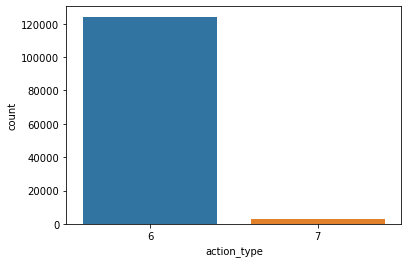

In [35]:
sns.countplot(x='action_type',data=df_hbl)

In [36]:
df_hbl['action_type'].value_counts()

6    124192
7      3166
Name: action_type, dtype: int64

# 총 8가지의 행동 유형을 구분한 코드 
## [0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 / 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션]
## 결제시도했는데 왜 안샀을까
## grouby 함수 사용하면 좋을듯

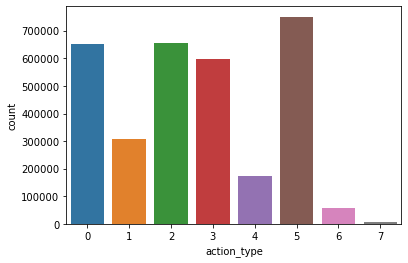

In [37]:
sns.countplot(x='action_type',data=o_a)

In [38]:
o_a['action_type'].value_counts()

5    750530
2    655266
0    651638
3    596765
1    307998
4    172240
6     56249
7      5676
Name: action_type, dtype: int64

In [39]:
o_a['clnt_id'].value_counts()

61252    6663
57915    5317
48181    4867
62445    4709
49906    4131
         ... 
54275       1
21573       1
57299       1
24850       1
62555       1
Name: clnt_id, Length: 72399, dtype: int64

In [40]:
df_hbl['clnt_id'].value_counts()

54703    229
49906    225
22910    222
30018    216
49028    214
        ... 
63441      1
43726      1
59590      1
27532      1
46218      1
Name: clnt_id, Length: 8869, dtype: int64

In [41]:
o_a['hit_tm']=o_a['hit_tm'].replace(':','',regex=True).astype(int)
for i in range(24):
    o_a.loc[(o_a['hit_tm']>(i*100)-1)&(o_a['hit_tm']<=(i*100)+59),'h_time']=i

In [42]:
#늦은시간대가 결제시도 대비 구매완료가 많다 ? 아니네

In [43]:
o_a.loc[o_a['action_type']=='5','action']=0
o_a.loc[o_a['action_type']=='6','action']=1
o_a[['h_time','action']].groupby(['h_time'], as_index=False).mean()

,h_time,action
0,0.0,0.091383
1,1.0,0.080074
2,2.0,0.081532
3,3.0,0.078426
4,4.0,0.069977
5,5.0,0.085602
6,6.0,0.074743
7,7.0,0.072904
8,8.0,0.080726
9,9.0,0.068714


# 조회시각별 결제시도대비 구매완료비율

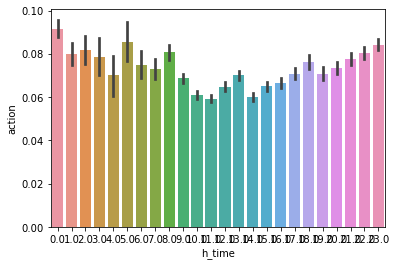

In [44]:
sns.barplot(x='h_time',y='action' ,data=o_a)

In [45]:
# 시각을 시간대별로 범주형 변수로 나눠서 (loc) 환불 관련 시각화진행

In [46]:
df_hbl['hit_tm'].value_counts()

11:17    349
10:31    341
11:58    326
10:29    324
11:18    322
        ... 
05:26      1
05:45      1
05:53      1
03:59      1
03:16      1
Name: hit_tm, Length: 1403, dtype: int64

In [47]:
df_hbl['hit_tm']=df_hbl['hit_tm'].replace(':','',regex=True).astype(int)
df_hbl['de_tm']=df_hbl['de_tm'].replace(':','',regex=True).astype(int)

In [48]:
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,PUSH,mobile_web,F,50,006,1568,20190716,1141,1000,1
1,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,PUSH,mobile_web,F,50,007,1583,20190716,1141,1000,1
2,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,PUSH,mobile_web,F,50,005,1625,20190716,1141,1290,1
3,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,PUSH,mobile_web,F,50,008,1394,20190716,1141,100,1
4,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,PUSH,mobile_web,F,50,001,0515,20190716,1141,7980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,1049,1200556,069636,NaN,...,unknown,mobile_app,F,40,001,1316,20190806,1049,55000,1
127354,04355,019,005,6,A01,20190806,1049,1200556,069636,NaN,...,unknown,mobile_app,F,40,002,1015,20190806,1049,12900,1
127355,45318,001,001,6,A01,20190927,302,229247,110554,NaN,...,unknown,mobile_web,F,40,001,0666,20190927,302,26800,1
127356,52942,103,008,6,A01,20190823,46,2776837,082877,NaN,...,unknown,mobile_web,F,40,001,0999,20190823,910,149400,1


In [49]:
# 범주형변수 시간대 생성

In [50]:
for i in range(24):
    df_hbl.loc[(df_hbl['hit_tm']>(i*100)-1)&(df_hbl['hit_tm']<=(i*100)+59),'h_time']=i
    df_hbl.loc[(df_hbl['de_tm']>(i*100)-1)&(df_hbl['de_tm']<=(i*100)+59),'d_time']=i
 

In [51]:
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,h_time,d_time
0,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,F,50,006,1568,20190716,1141,1000,1,11.0,11.0
1,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,F,50,007,1583,20190716,1141,1000,1,11.0,11.0
2,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,F,50,005,1625,20190716,1141,1290,1,11.0,11.0
3,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,F,50,008,1394,20190716,1141,100,1,11.0,11.0
4,28304,001,022,6,A03,20190716,1141,1212297,051903,NaN,...,F,50,001,0515,20190716,1141,7980,1,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,1049,1200556,069636,NaN,...,F,40,001,1316,20190806,1049,55000,1,10.0,10.0
127354,04355,019,005,6,A01,20190806,1049,1200556,069636,NaN,...,F,40,002,1015,20190806,1049,12900,1,10.0,10.0
127355,45318,001,001,6,A01,20190927,302,229247,110554,NaN,...,F,40,001,0666,20190927,302,26800,1,3.0,3.0
127356,52942,103,008,6,A01,20190823,46,2776837,082877,NaN,...,F,40,001,0999,20190823,910,149400,1,0.0,9.0


In [52]:
df_hbl.drop('sech_kwd',axis=1,inplace=True)
df_hbl.drop('hit_tm',axis=1,inplace=True)
df_hbl.drop('de_tm',axis=1,inplace=True)
df_hbl.drop('hit_pss_tm',axis=1,inplace=True)
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,buy_am,buy_ct,h_time,d_time
0,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,mobile_web,F,50,006,1568,20190716,1000,1,11.0,11.0
1,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,mobile_web,F,50,007,1583,20190716,1000,1,11.0,11.0
2,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,mobile_web,F,50,005,1625,20190716,1290,1,11.0,11.0
3,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,mobile_web,F,50,008,1394,20190716,100,1,11.0,11.0
4,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,mobile_web,F,50,001,0515,20190716,7980,1,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,069636,85,1200,unknown,mobile_app,F,40,001,1316,20190806,55000,1,10.0,10.0
127354,04355,019,005,6,A01,20190806,069636,85,1200,unknown,mobile_app,F,40,002,1015,20190806,12900,1,10.0,10.0
127355,45318,001,001,6,A01,20190927,110554,20,271,unknown,mobile_web,F,40,001,0666,20190927,26800,1,3.0,3.0
127356,52942,103,008,6,A01,20190823,082877,216,3208,unknown,mobile_web,F,40,001,0999,20190823,149400,1,0.0,9.0


In [53]:
df_hbl['biz_unit'].value_counts()

A03    116173
A02      9776
A01      1409
Name: biz_unit, dtype: int64

In [54]:
df_hbl['action']=0
df_hbl.loc[df_hbl['action_type']=='6','action']=0
df_hbl.loc[df_hbl['action_type']=='7','action']=1

df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,...,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,buy_am,buy_ct,h_time,d_time,action
0,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,...,F,50,006,1568,20190716,1000,1,11.0,11.0,0
1,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,...,F,50,007,1583,20190716,1000,1,11.0,11.0,0
2,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,...,F,50,005,1625,20190716,1290,1,11.0,11.0,0
3,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,...,F,50,008,1394,20190716,100,1,11.0,11.0,0
4,28304,001,022,6,A03,20190716,051903,56,1303,PUSH,...,F,50,001,0515,20190716,7980,1,11.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,069636,85,1200,unknown,...,F,40,001,1316,20190806,55000,1,10.0,10.0,0
127354,04355,019,005,6,A01,20190806,069636,85,1200,unknown,...,F,40,002,1015,20190806,12900,1,10.0,10.0,0
127355,45318,001,001,6,A01,20190927,110554,20,271,unknown,...,F,40,001,0666,20190927,26800,1,3.0,3.0,0
127356,52942,103,008,6,A01,20190823,082877,216,3208,unknown,...,F,40,001,0999,20190823,149400,1,0.0,9.0,0


In [55]:
df_hbl[['h_time','action']].groupby(['h_time'], as_index=False).mean()

,h_time,action
0,0.0,0.062658
1,1.0,0.057720
2,2.0,0.048175
3,3.0,0.026432
4,4.0,0.028497
5,5.0,0.056338
6,6.0,0.056671
7,7.0,0.035734
8,8.0,0.035002
9,9.0,0.030693


In [56]:
# 환불한 사람들만 따로빼서 groupby 해보고 시각화 진행 -- 확실한 비교가 가능하게 

# 실제 구매를 한 고객들의 자료에서 좌측이 조회시각별 환불비율 우측이 구매시각별 환불비율 0시-23시

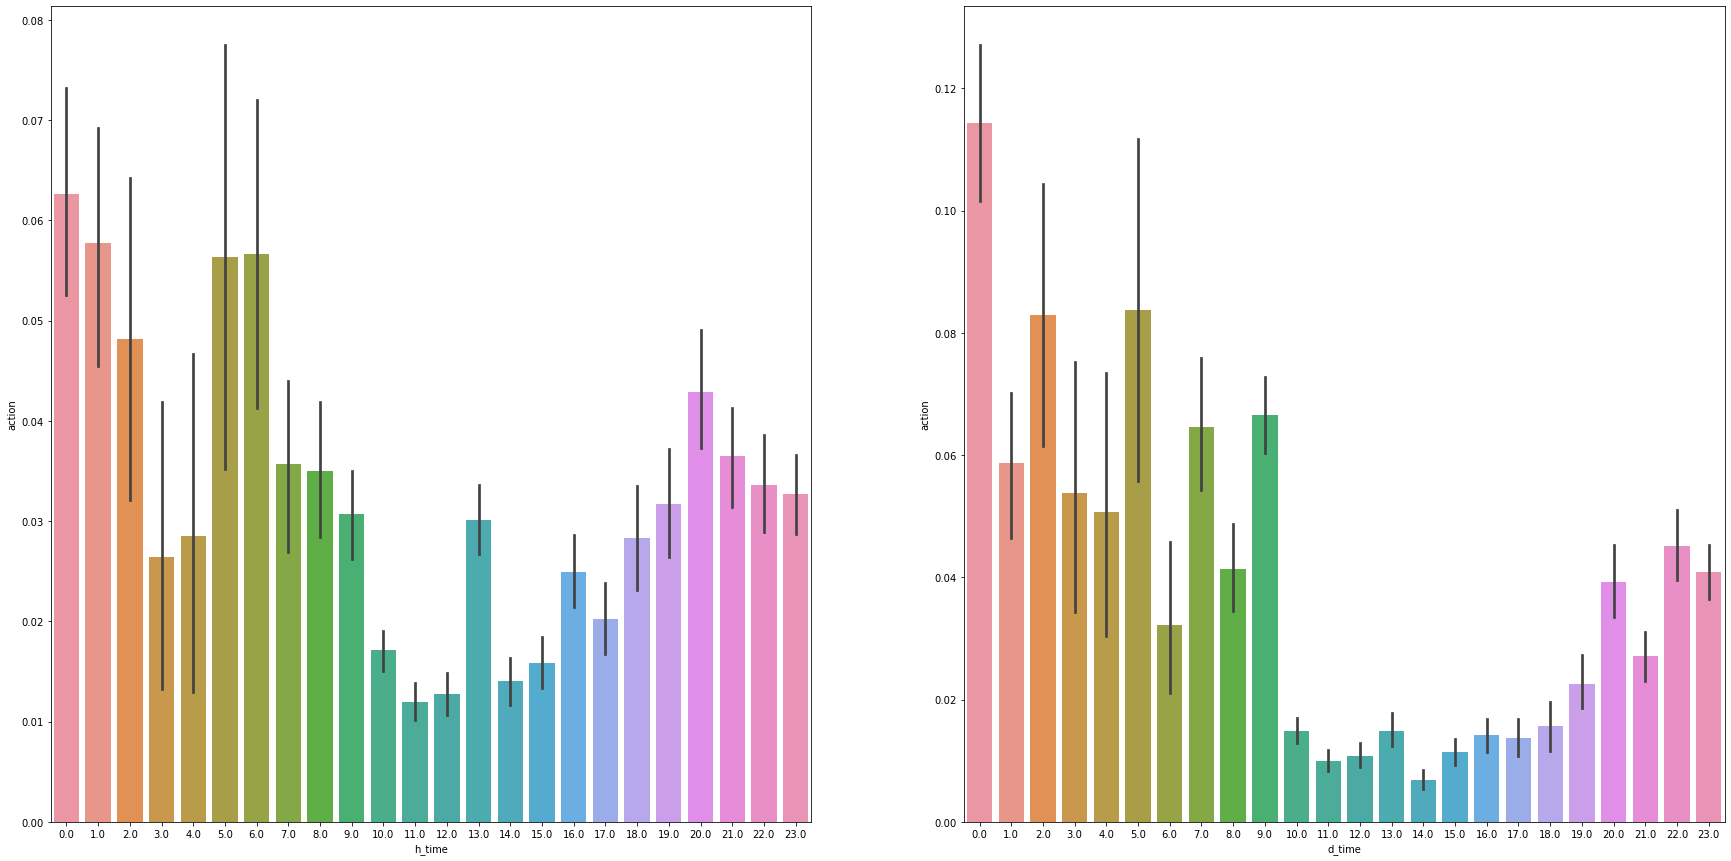

In [61]:
fig,axes=plt.subplots(1,2,figsize=(30,15))
ax1=sns.barplot(x='h_time',y='action',data=df_hbl ,ax=axes[0])
ax2=sns.barplot(x='d_time',y='action',data=df_hbl, ax=axes[1])